In [1]:
import pandas

In [24]:
import matplotlib.pyplot as plt

### Generate dates

In [11]:
from datetime import datetime as D
import numpy as np

In [12]:
yr_sec = 3.2e7
n_yr = 3

In [13]:
gen_timestamps = lambda n: [D.now().timestamp() - n_yr*yr_sec*np.random.random() for i in range(n)]

In [14]:
gen_timestamps(10)

[1546638805.5470178,
 1567852314.913588,
 1557678967.983418,
 1617334571.5238483,
 1609216767.7515557,
 1540029088.944166,
 1555216079.0197878,
 1541486881.0219615,
 1608484261.402189,
 1590425137.0333838]

### Generate cores

In [84]:
nt = np.arange(10) + 1
gen_cores = lambda n: list(32*((2*np.random.random(n))*(np.arange(n)+1)).astype(int))

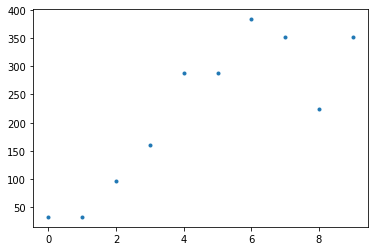

In [85]:
plt.plot(gen_cores(10), '.')

### Generate Sites

In [86]:
Sites = ["ral-cloud244", "UK-CAM-CUMULUS47", "UKI-LT2-IC-HEP25", "UKI-NORTHGRID-MAN-HEP14", "RAL-LCG211", "UKI-NORTHGRID-LANCS-HEP7", "UKI-SOUTHGRID-RALPP5", "UKI-SCOTGRID-GLASGOW4", "UKI-LT2-QMUL4", "UKI-NORTHGRID-LIV-HEP3", "UKI-SCOTGRID-ECDF2", "UKI-SOUTHGRID-OX-HEP2", "UKI-SOUTHGRID-BRIS-HEP1", "UKI-LT2-Brunel9", "UKI-NORTHGRID-SHEF-HEP7", "UKI-SOUTHGRID-CAM-HEP", "UKI-SOUTHGRID-BHAM-HEP", "UKI-LT2-RH"]

In [87]:
gen_sites = lambda n: [np.random.choice(Sites) for i in range(n)]

### Generate VOs

In [88]:
# VOs would be grouped by site, but don't care here
VOs = ["AENEAS", "Allocation", "CCFE", "CLF", "Capacity", "Diamond", "EUCLID", "ISIS", "LSST", "RAL-LCG2", "UK-CAM-CUMULUS", "UKI-LT2-Brunel", "UKI-LT2-IC-HEP", "UKI-LT2-QMUL", "UKI-LT2-RHUL", "UKI-NORTHGRID-LANCS-HEP", "UKI-NORTHGRID-LIV-HEP", "UKI-NORTHGRID-MAN-HEP", "UKI-NORTHGRID-SHEF-HEP", "UKI-SCOTGRID-ECDF", "UKI-SCOTGRID-GLASGOW", "UKI-SOUTHGRID-BHAM-HEP", "UKI-SOUTHGRID-BRIS-HEP", "UKI-SOUTHGRID-CAM-HEP", "UKI-SOUTHGRID-OX-HEP", "UKI-SOUTHGRID-RALPP", "casu", "dirac", "dune", "eMERLIN", "gaia", "gaia-dev", "gaia-prod", "gaia-test", "iris.ac.uk", "jintrac", "lsst", "lz", "ral-cloud", "skatelescope.eu", "vcycle", "virgo", "vo.cta.in2p3.fr" ]

In [89]:
gen_vos = lambda n: [np.random.choice(VOs) for i in range(n)]

## Generate dataset

In [131]:
def gen_dataset(N):
    import pandas as pd
    dates = sorted(gen_timestamps(N))
    cores = gen_cores(N)
    sites = gen_sites(N)
    vos = gen_vos(N)
    
    columns = ['timestamp', 'cores', 'site', 'vo']
    dtypes = [float, int, str, str]
    
    return pd.DataFrame(np.stack([dates, cores, sites, vos]).T, columns=columns, dtype=object)
    

In [132]:
N = 10000

In [133]:
dataset = gen_dataset(N)

In [136]:
dataset.to_csv(f'fakeDataset_{N}.2.csv', index=False)

In [137]:
dataset.to_csv()

',timestamp,cores,site,vo\n0,1527426038.1798973,0,UKI-NORTHGRID-LIV-HEP3,casu\n1,1527431988.3292546,0,UKI-SCOTGRID-ECDF2,vcycle\n2,1527432081.9022503,160,UK-CAM-CUMULUS47,UKI-LT2-QMUL\n3,1527438668.1921163,160,UKI-SOUTHGRID-OX-HEP2,UKI-LT2-RHUL\n4,1527460988.584503,224,ral-cloud244,gaia-test\n5,1527466252.555189,160,UKI-NORTHGRID-LANCS-HEP7,UKI-LT2-Brunel\n6,1527471073.6427245,320,UKI-LT2-QMUL4,lsst\n7,1527477005.1871576,320,UKI-SCOTGRID-ECDF2,ral-cloud\n8,1527504421.4827619,416,UKI-NORTHGRID-LANCS-HEP7,AENEAS\n9,1527513741.745979,32,UKI-NORTHGRID-LIV-HEP3,RAL-LCG2\n10,1527514355.0797439,448,UKI-LT2-Brunel9,virgo\n11,1527514999.6200185,160,UKI-SOUTHGRID-RALPP5,UK-CAM-CUMULUS\n12,1527535835.1596775,288,UK-CAM-CUMULUS47,AENEAS\n13,1527543471.231091,288,UKI-LT2-Brunel9,ral-cloud\n14,1527561991.8909554,192,RAL-LCG211,gaia-dev\n15,1527597435.9534733,96,UKI-NORTHGRID-LANCS-HEP7,virgo\n16,1527614701.882181,672,UKI-SCOTGRID-ECDF2,UKI-SOUTHGRID-RALPP\n17,1527626980.8608356,192,UKI-LT2-QMUL4,UKI